In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [8]:
df = pd.read_csv('http://nucsmb/csv/data/small_csv_files/BuildingConsentsByInstitutionalSectorMonthly.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439619 entries, 0 to 439618
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Series_reference  439619 non-null  object 
 1   Period            439619 non-null  float64
 2   Data_value        439619 non-null  int64  
 3   Suppressed        439619 non-null  object 
 4   Status            439619 non-null  object 
 5   Units             439619 non-null  object 
 6   Magnitude         439619 non-null  int64  
 7   Subject           439619 non-null  object 
 8   Group             439619 non-null  object 
 9   Series_title_1    439619 non-null  object 
 10  Series_title_2    439619 non-null  object 
 11  Series_title_3    439619 non-null  object 
 12  Series_title_4    439619 non-null  object 
 13  Series_title_5    0 non-null       float64
dtypes: float64(2), int64(2), object(10)
memory usage: 47.0+ MB


In [10]:
df.describe()

,Period,Data_value,Magnitude,Series_title_5
count,439619.000000,4.396190e+05,439619.0,0.0
mean,2006.195939,2.091743e+07,0.0,NaN
std,11.082554,1.122071e+08,0.0,NaN
min,1965.040000,0.000000e+00,0.0,NaN
25%,1997.100000,0.000000e+00,0.0,NaN
50%,2006.110000,2.600000e+01,0.0,NaN
75%,2015.120000,5.990000e+05,0.0,NaN
max,2025.010000,3.346947e+09,0.0,NaN


In [11]:
df = df.drop(['Magnitude', 'Series_title_5'], axis=1)

In [12]:
df.tail()

,Series_reference,Period,Data_value,Suppressed,Status,Units,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4
439614,BLDM.SV63000C2,2024.09,0,n,F,Dollars,Building Consents - BLD,Building consents by institutional sector,Rest of the world,Non-building construction,New plus altered,Value
439615,BLDM.SV63000C2,2024.10,0,n,F,Dollars,Building Consents - BLD,Building consents by institutional sector,Rest of the world,Non-building construction,New plus altered,Value
439616,BLDM.SV63000C2,2024.11,0,n,F,Dollars,Building Consents - BLD,Building consents by institutional sector,Rest of the world,Non-building construction,New plus altered,Value
439617,BLDM.SV63000C2,2024.12,0,n,F,Dollars,Building Consents - BLD,Building consents by institutional sector,Rest of the world,Non-building construction,New plus altered,Value
439618,BLDM.SV63000C2,2025.01,0,n,F,Dollars,Building Consents - BLD,Building consents by institutional sector,Rest of the world,Non-building construction,New plus altered,Value


In [13]:
df.describe()

,Period,Data_value
count,439619.000000,4.396190e+05
mean,2006.195939,2.091743e+07
std,11.082554,1.122071e+08
min,1965.040000,0.000000e+00
25%,1997.100000,0.000000e+00
50%,2006.110000,2.600000e+01
75%,2015.120000,5.990000e+05
max,2025.010000,3.346947e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439619 entries, 0 to 439618
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Series_reference  439619 non-null  object 
 1   Period            439619 non-null  float64
 2   Data_value        439619 non-null  int64  
 3   Suppressed        439619 non-null  object 
 4   Status            439619 non-null  object 
 5   Units             439619 non-null  object 
 6   Subject           439619 non-null  object 
 7   Group             439619 non-null  object 
 8   Series_title_1    439619 non-null  object 
 9   Series_title_2    439619 non-null  object 
 10  Series_title_3    439619 non-null  object 
 11  Series_title_4    439619 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 40.2+ MB


In [15]:
df['Period'].tail()

439614    2024.09
439615    2024.10
439616    2024.11
439617    2024.12
439618    2025.01
Name: Period, dtype: float64

In [16]:
# Turn Period into string
s = df['Period']  
#now drop it; unneeded
df = df.drop('Period', axis=1)
# Convert float → string → datetime 
dt = pd.to_datetime(s.astype(str), format="%Y.%m") 
# Restore it: 
df["Period"] = dt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439619 entries, 0 to 439618
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Series_reference  439619 non-null  object        
 1   Data_value        439619 non-null  int64         
 2   Suppressed        439619 non-null  object        
 3   Status            439619 non-null  object        
 4   Units             439619 non-null  object        
 5   Subject           439619 non-null  object        
 6   Group             439619 non-null  object        
 7   Series_title_1    439619 non-null  object        
 8   Series_title_2    439619 non-null  object        
 9   Series_title_3    439619 non-null  object        
 10  Series_title_4    439619 non-null  object        
 11  Period            439619 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 40.2+ MB


In [17]:
print(df['Series_reference'].nunique(), " Series_reference")
print(df['Suppressed'].nunique(), " Suppressed")
print(df['Status'].nunique(), " Status")
print(df['Units'].nunique(), " Units")
print(df['Subject'].nunique(), " Subject")
print(df['Group'].nunique(), " Group")
print(df['Series_title_1'].nunique(), " Series_title_1")
print(df['Series_title_2'].nunique(), " Series_title_1")
print(df['Series_title_3'].nunique(), " Series_title_1")
print(df['Series_title_4'].nunique(), " Series_title_1")

1014  Series_reference
1  Suppressed
1  Status
3  Units
1  Subject
1  Group
7  Series_title_1
26  Series_title_1
3  Series_title_1
3  Series_title_1


In [18]:
#drop all columns with with a single value
for col in list(df.columns):
    if df[col].nunique() < 2:
        df.drop(columns=[col], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439619 entries, 0 to 439618
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Series_reference  439619 non-null  object        
 1   Data_value        439619 non-null  int64         
 2   Units             439619 non-null  object        
 3   Series_title_1    439619 non-null  object        
 4   Series_title_2    439619 non-null  object        
 5   Series_title_3    439619 non-null  object        
 6   Series_title_4    439619 non-null  object        
 7   Period            439619 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 26.8+ MB


In [19]:
print(df.head())
print(df.tail())

  Series_reference  Data_value   Units     Series_title_1    Series_title_2  \
0   BLDM.SV00001A1        1973  Number  Total all sectors  All construction   
1   BLDM.SV00001A1        2591  Number  Total all sectors  All construction   
2   BLDM.SV00001A1        2166  Number  Total all sectors  All construction   
3   BLDM.SV00001A1        2234  Number  Total all sectors  All construction   
4   BLDM.SV00001A1        2246  Number  Total all sectors  All construction   

  Series_title_3 Series_title_4     Period  
0            New         Number 1990-04-01  
1            New         Number 1990-05-01  
2            New         Number 1990-06-01  
3            New         Number 1990-07-01  
4            New         Number 1990-08-01  
       Series_reference  Data_value    Units     Series_title_1  \
439614   BLDM.SV63000C2           0  Dollars  Rest of the world   
439615   BLDM.SV63000C2           0  Dollars  Rest of the world   
439616   BLDM.SV63000C2           0  Dollars  Rest of 

In [20]:
df['Units'].head(10)

0    Number
1    Number
2    Number
3    Number
4    Number
5    Number
6    Number
7    Number
8    Number
9    Number
Name: Units, dtype: object

In [21]:
print(sorted(df['Units'].unique()))
print(sorted(df['Series_title_1'].unique()))
print(sorted(df['Series_title_3'].unique()))
print(sorted(df['Series_title_4'].unique()))

['Dollars', 'Number', 'SQM']
['Financial business enterprises', 'General government institutions', 'Households', 'Non-financial business enterprises', 'Non-profit institutions serving households', 'Rest of the world', 'Total all sectors']
['Altered', 'New', 'New plus altered']
['Floor area', 'Number', 'Value']


In [22]:
df.to_csv('BuildingConsentsByInstitutionalSectorMonthly-cleaned.csv', index=False)

In [26]:
df = pd.read_csv('BuildingConsentsByInstitutionalSectorMonthly-cleaned.csv')

In [28]:
df['Period'] = pd.to_datetime(df['Period'])
df['Epoch'] = df['Period'].astype('int64') // 10**9
df = df.drop('Period', axis=1)

In [29]:
df.head()

,Series_reference,Data_value,Units,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Epoch
0,BLDM.SV00001A1,1973,Number,Total all sectors,All construction,New,Number,638928000
1,BLDM.SV00001A1,2591,Number,Total all sectors,All construction,New,Number,641520000
2,BLDM.SV00001A1,2166,Number,Total all sectors,All construction,New,Number,644198400
3,BLDM.SV00001A1,2234,Number,Total all sectors,All construction,New,Number,646790400
4,BLDM.SV00001A1,2246,Number,Total all sectors,All construction,New,Number,649468800


In [30]:
X = df.drop('Data_value', axis=1)
y = df['Data_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
transformer = ColumnTransformer(transformers=[
    ('series_reference', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_reference']),
    ('units', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Units']),
    ('series_title_1', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_1']),
    ('series_title_2', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_2']),
    ('series_title_3', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_3']),
    ('series_title_4', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_4']),
    ('epoch', Pipeline([
        ('scaler', StandardScaler())
    ]), ['Epoch'])
], remainder='drop')

In [40]:
transformer_c = ColumnTransformer(transformers=[
    ('series_reference', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_reference']),
    ('units', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Units']),
    ('series_title_1', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_1']),
    ('series_title_2', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_2']),
    ('series_title_3', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_3']),
    ('series_title_4', Pipeline([
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), ['Series_title_4']),
    ('data_value', Pipeline([
        ('Data_value', StandardScaler())
    ]), ['Epoch']),
    ('epoch', Pipeline([
        ('scaler', StandardScaler())
    ]), ['Epoch'])
], remainder='drop')

In [41]:
Xc = df.copy()

In [42]:
regression_model = Pipeline(steps=[('transformer', transformer), ('model', LinearRegression())])
kmeans_model = Pipeline(steps=[('transformer', transformer_c), ('model', KMeans(n_clusters=5, random_state=42))]) 

In [48]:
kmeans_model.fit(Xc)
labels = kmeans_model.named_steps['model'].labels_

In [49]:
regression_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('series_reference', ...), ('units', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differ

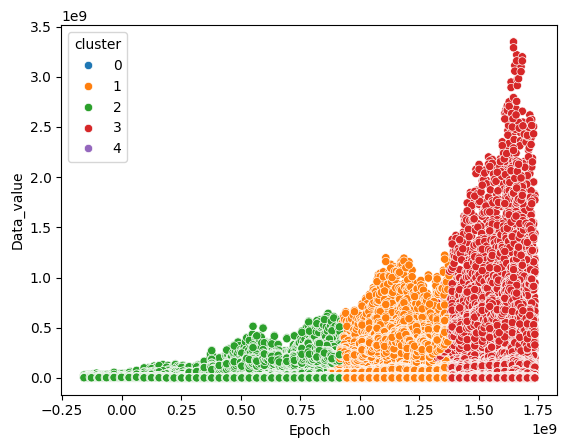

In [50]:
df_plot = Xc.copy()
df_plot['cluster'] = labels
sns.scatterplot( data=df_plot, x='Epoch', y='Data_value', hue='cluster', palette='tab10') 
plt.show()

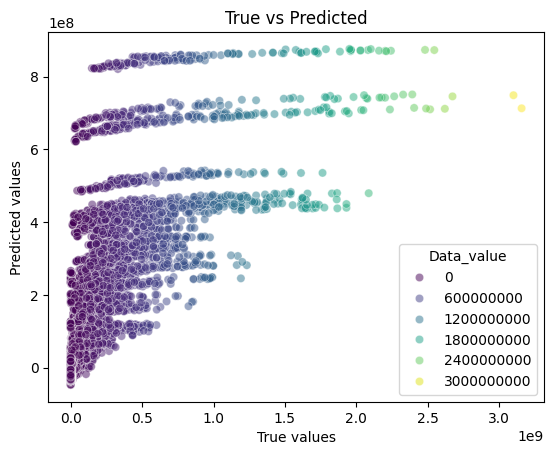

In [55]:
y_pred = regression_model.predict(X_test)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, hue=y_test, palette='viridis')
plt.xlabel("True values") 
plt.ylabel("Predicted values") 
plt.title("True vs Predicted") 
plt.show()

In [57]:
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 71215326.54


In [66]:
elastic_model = Pipeline(steps=[('transformer', transformer), ('model', ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=5000, random_state=42))])

In [67]:
elastic_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('transformer', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('series_reference', ...), ('units', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differ

In [70]:
y_pred_el = elastic_model.predict(X_test)
msel = mean_squared_error(y_test, y_pred_el) 
rmsel = np.sqrt(msel)
print(f"RMSE: {rmsel:.2f}")

RMSE: 94033412.74


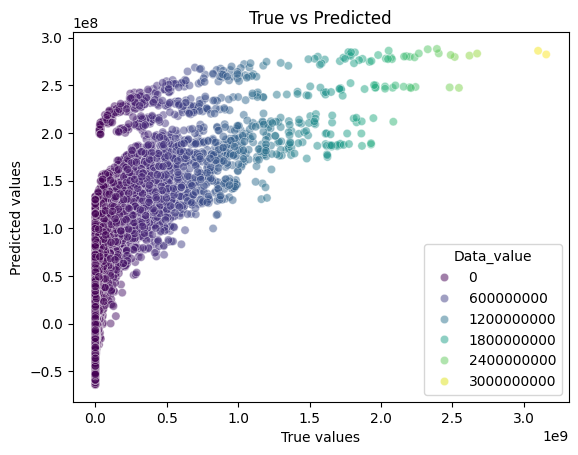

In [71]:
sns.scatterplot(x=y_test, y=y_pred_el, alpha=0.5, hue=y_test, palette='viridis')
plt.xlabel("True values") 
plt.ylabel("Predicted values") 
plt.title("True vs Predicted") 
plt.show()